# Data Science Job Salaries

Explanatory Data Analysis

We are working with lot of job listings related to Data Science and we want to come up with a few questions that can help us better understand the data we are working with and what our goal is.

1. How many job listings are distributed per year, currency, experience level and employment type?
2. Are there any trends in salaries for experience level, company size, emoplyee residence?
3. What is the distribution of experience levels, company location and employee residence and so on across the the dataset for salaries?
 
 EDA Goal: Extracting as much information as possible from the csv file and visualizing it to get an understanding of what we are working with.
 
 Final Goal: Building a machine learning model to predict the salary of a data science jobs based on features like job title, experience level location, employment type, the year and so on.

Importing/Installing necessery libraries

- pip install seaborn 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the CSV file

In [2]:
file_path = 'DataScience_salaries_2024.csv'
df = pd.read_csv(file_path)

A short overview of what we are working with, so by using df.head we can get a better catogorization of our data.


In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [27]:
total_job_listings = df.shape[0]
print(f"Total number of job listings: {total_job_listings}")


average_salary = df['salary_in_usd'].mean()
print(f"\nAverage salary: ${average_salary:.2f}")


job_listings_by_experience_level = df['experience_level'].value_counts().sort_index()
print("\nNumber of job listings by experience level:")
print(job_listings_by_experience_level)

job_listings_by_employment_type = df['employment_type'].value_counts().sort_index()
print("\nNumber of job listings by employment type:")
print(job_listings_by_employment_type)

job_listings_by_employee_residence = df['employee_residence'].value_counts().sort_index()
print("\nNumber of job listings by employee residence:")
print(job_listings_by_employee_residence)


job_listings_per_year = df['work_year'].value_counts().sort_index()
print("\nNumber of job listings per year:")
print(job_listings_per_year)

job_listings_by_currency = df['salary_currency'].value_counts()
print("\nNumber of job listings per currency:")
print(job_listings_by_currency)


Total number of job listings: 14838

Average salary: $149874.72

Number of job listings by experience level:
experience_level
EN    1148
EX     441
MI    3553
SE    9696
Name: count, dtype: int64

Number of job listings by employment type:
employment_type
CT       26
FL       13
FT    14772
PT       27
Name: count, dtype: int64

Number of job listings by employee residence:
employee_residence
AD        1
AE        5
AM        2
AR       11
AS        1
      ...  
UG        1
US    12926
UZ        3
VN        6
ZA       15
Name: count, Length: 88, dtype: int64

Number of job listings per year:
work_year
2020      75
2021     218
2022    1652
2023    8519
2024    4374
Name: count, dtype: int64

Number of job listings per currency:
salary_currency
USD    13682
GBP      567
EUR      424
INR       53
CAD       51
AUD       12
CHF        8
PLN        7
SGD        6
BRL        4
JPY        4
HUF        3
TRY        3
DKK        3
THB        2
NOK        2
NZD        1
CLP        1
ZAR        

From above we can see that there are 14834 job listings with the avarage salary being $149874.72

To get a better visualization we have decided to turn it into column chart, which will also help us to determine what we can work with in the future that will help our model

C:\Users\elshe\AppData\Local\Temp\ipykernel_13896\3672191201.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


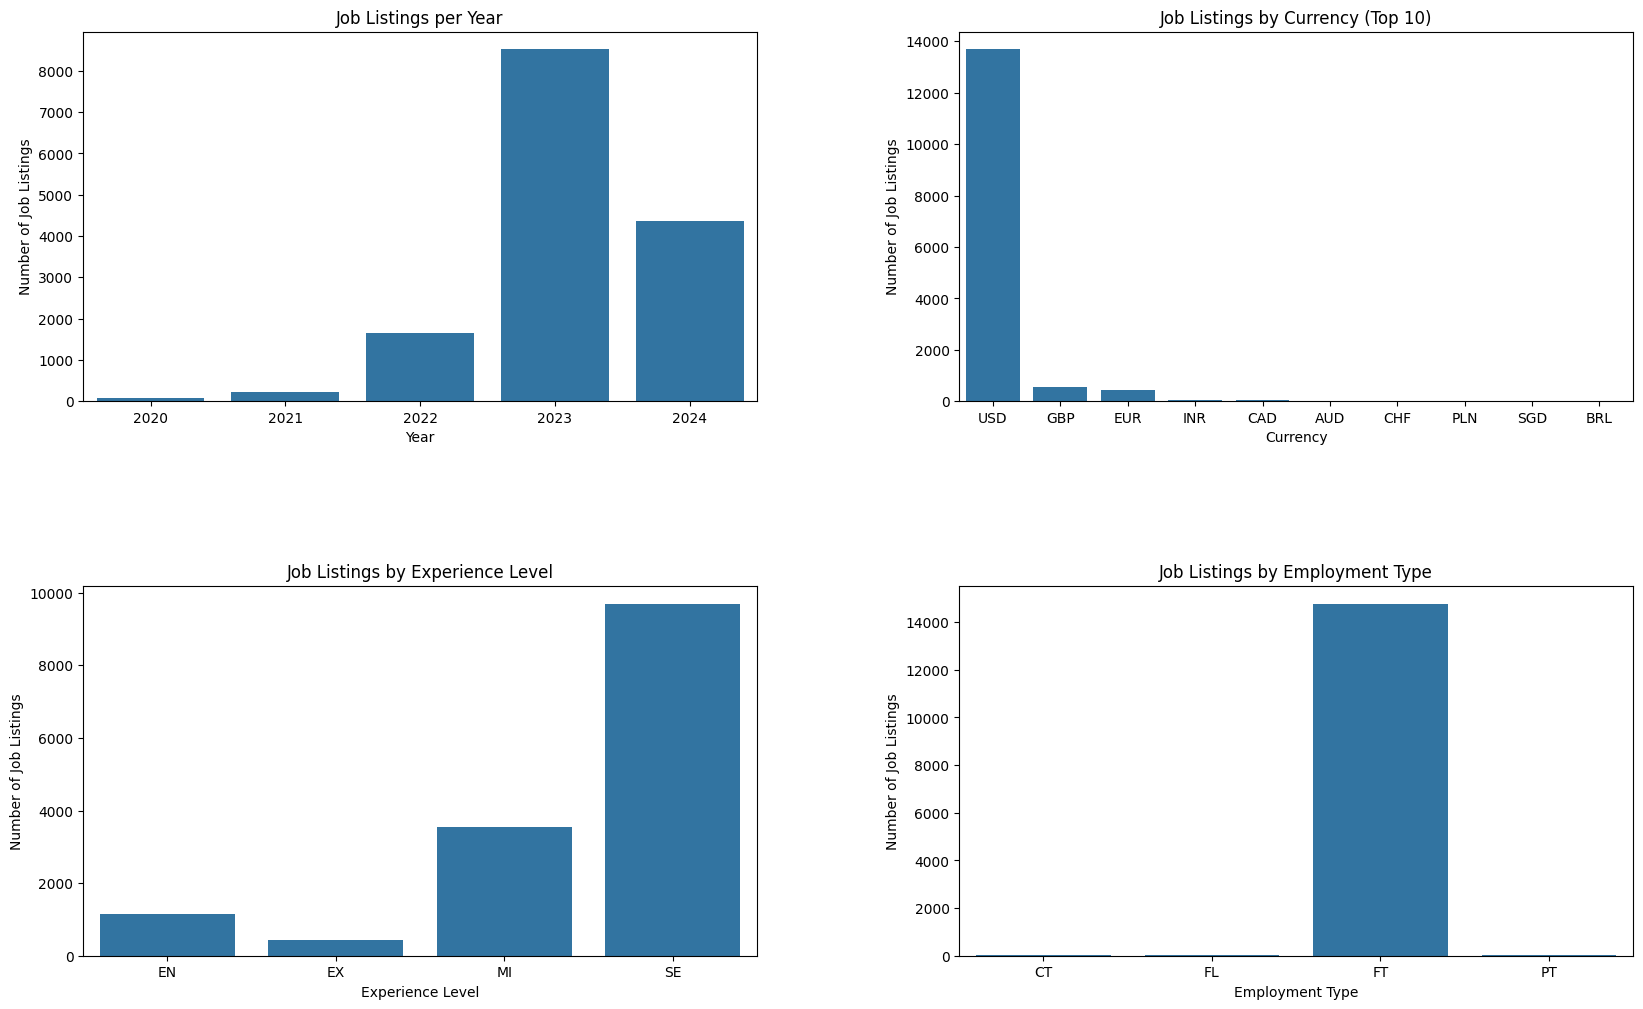

In [28]:
    fig, axs = plt.subplots(2, 2, figsize=(20, 12), gridspec_kw={'hspace': 0.5, 'wspace': 0.3})
    plt.subplot(2, 2, 1)
    sns.barplot(x=job_listings_per_year.index, y=job_listings_per_year.values)
    plt.title('Job Listings per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Job Listings')


plt.subplot(2, 2, 2)
top_currencies = job_listings_by_currency.nlargest(10)  # Display top 10 for readability
sns.barplot(x=top_currencies.index, y=top_currencies.values)
plt.title('Job Listings by Currency (Top 10)')
plt.xlabel('Currency')
plt.ylabel('Number of Job Listings')


plt.subplot(2, 2, 3)
sns.barplot(x=job_listings_by_experience_level.index, y=job_listings_by_experience_level.values)
plt.title('Job Listings by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Job Listings')


plt.subplot(2, 2, 4)
sns.barplot(x=job_listings_by_employment_type.index, y=job_listings_by_employment_type.values)
plt.title('Job Listings by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Job Listings')


plt.tight_layout()
plt.show()

Most importans ones are listings per year, currency, experience level and employment type

1. 2023 Is the most dominant but this is most likely due to 2024 still not being fully over

2. For currency USD is the most dominant one but since there is a data type with all salaries converted to usd, this should not be a problem 

3. Smallest is Executive but biggest is Senior positions. This can also skew the price towards having higher salaries due to relatively low listings for Entry and Middle level experience

4. For employment type, it might be seen as only Full Time exists, but in reality all type of employment are in the data but since there are very few CT, FR, PT but a lot of FT, it is very hard to see them.

Then we move to listings with employee residence and company location

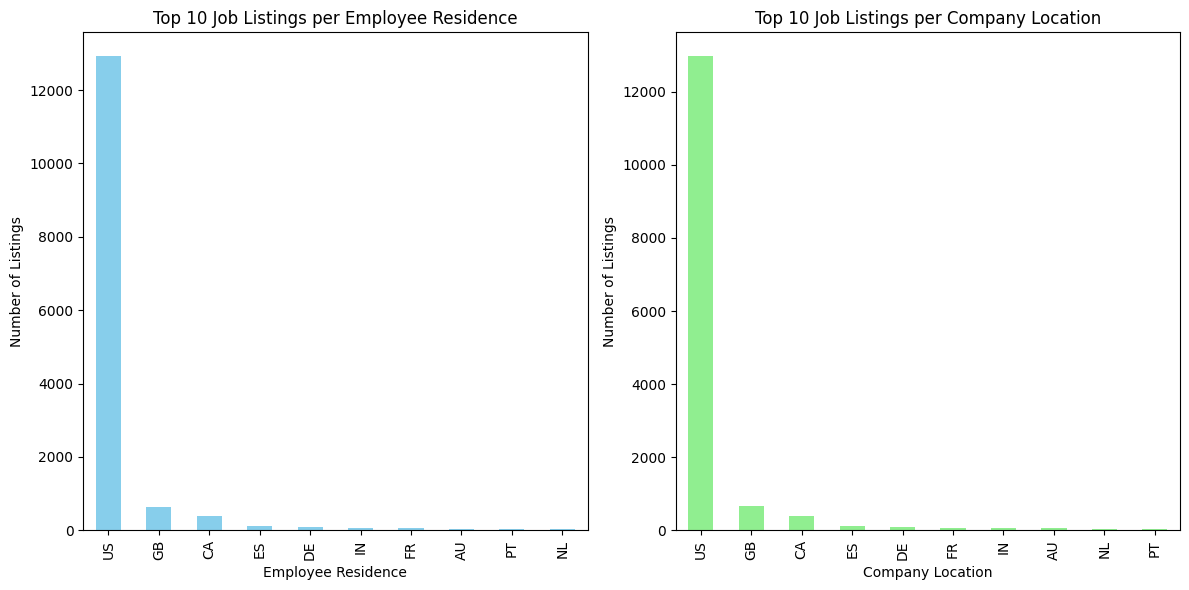

In [29]:

top_10_employee_residence = df['employee_residence'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_10_employee_residence.plot(kind='bar', color='skyblue')
plt.title('Top 10 Job Listings per Employee Residence')
plt.xlabel('Employee Residence')
plt.ylabel('Number of Listings')


top_10_company_location = df['company_location'].value_counts().head(10)

plt.subplot(1, 2, 2)
top_10_company_location.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Job Listings per Company Location')
plt.xlabel('Company Location')
plt.ylabel('Number of Listings')

plt.tight_layout()
plt.show()

Employee Residence and Company Locations are overlapping and can be seen that US is the most reported

Correlation Plot is often useful for both EDA and also for training/testing phase where we can quickly asses which data types would be best to utilize, however in this case since we dont have lot of features, and most are not integers, correlation plot is not really useful

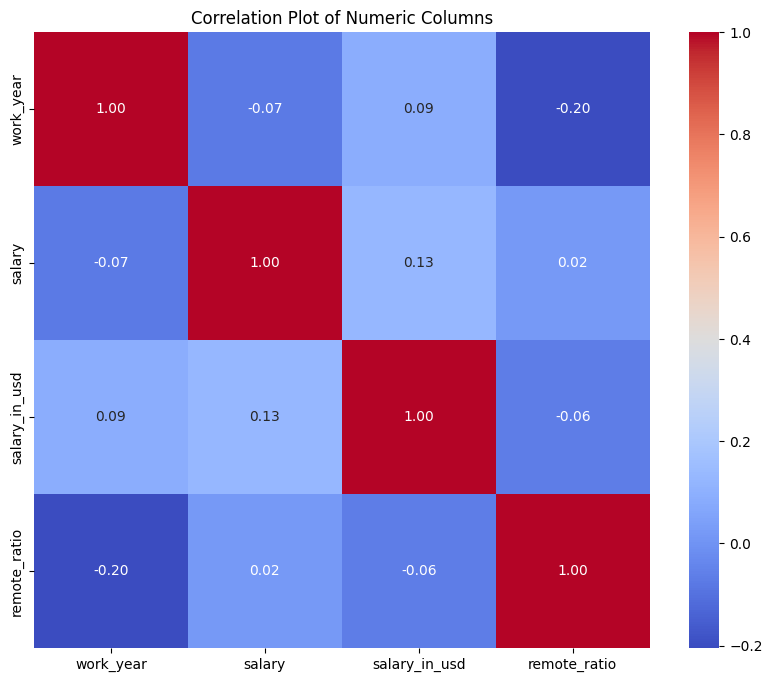

In [6]:

import seaborn as sns
import matplotlib.pyplot as plt


numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Plot of Numeric Columns')
plt.show()


Job Titles were a bit tricky since there were too many of them, we decided to just go with the most common 10

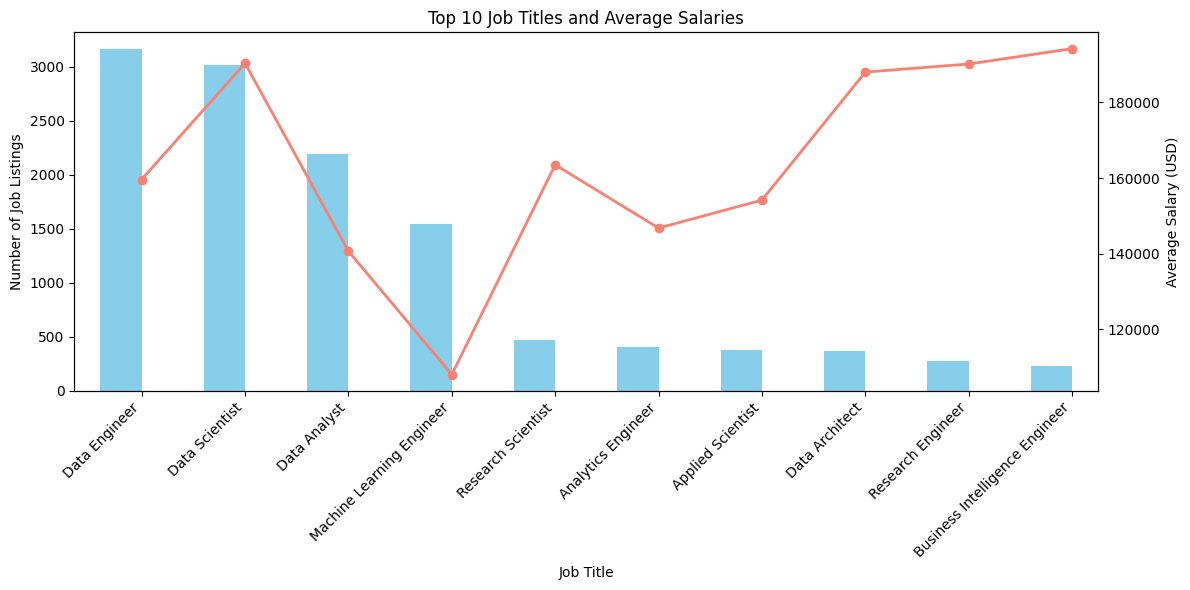

In [31]:

top_10_job_titles = df['job_title'].value_counts().head(10)


job_titles = top_10_job_titles.index.tolist()

avg_salary_by_job_title = df[df['job_title'].isin(job_titles)].groupby('job_title')['salary_in_usd'].mean()


fig, ax1 = plt.subplots(figsize=(12, 6))


top_10_job_titles.plot(kind='bar', color='skyblue', ax=ax1, position=1, width=0.4)
ax1.set_title('Top 10 Job Titles and Average Salaries')
ax1.set_xlabel('Job Title')
ax1.set_ylabel('Number of Job Listings')
plt.xticks(rotation=45, ha='right')



ax2 = ax1.twinx()
plt.plot(job_titles,avg_salary_by_job_title, marker='o', color='salmon',  linewidth=2)
ax2.set_ylabel('Average Salary (USD)')


fig.tight_layout()
plt.show()

But we also wanted to visualize how it would look if we can show the relative salary for each one of these positions. Though it is important remember that lot of factors go into determining the salary such as company size, experience level, etc

From the chart we can see that Data Engineer and Data Scientists are the most listed job offers.

From the top 10 most common listings, Machine Learning Engineer has the lowest pay while Business Intelligence Engineer has the highest.

Finally we will visualize 3 different charts with the goal of showing how the avarage salary differs for different factors such as time, experience level and the size of the company

Number of job listings per company size:
company_size
M    13674
L      983
S      181
Name: count, dtype: int64


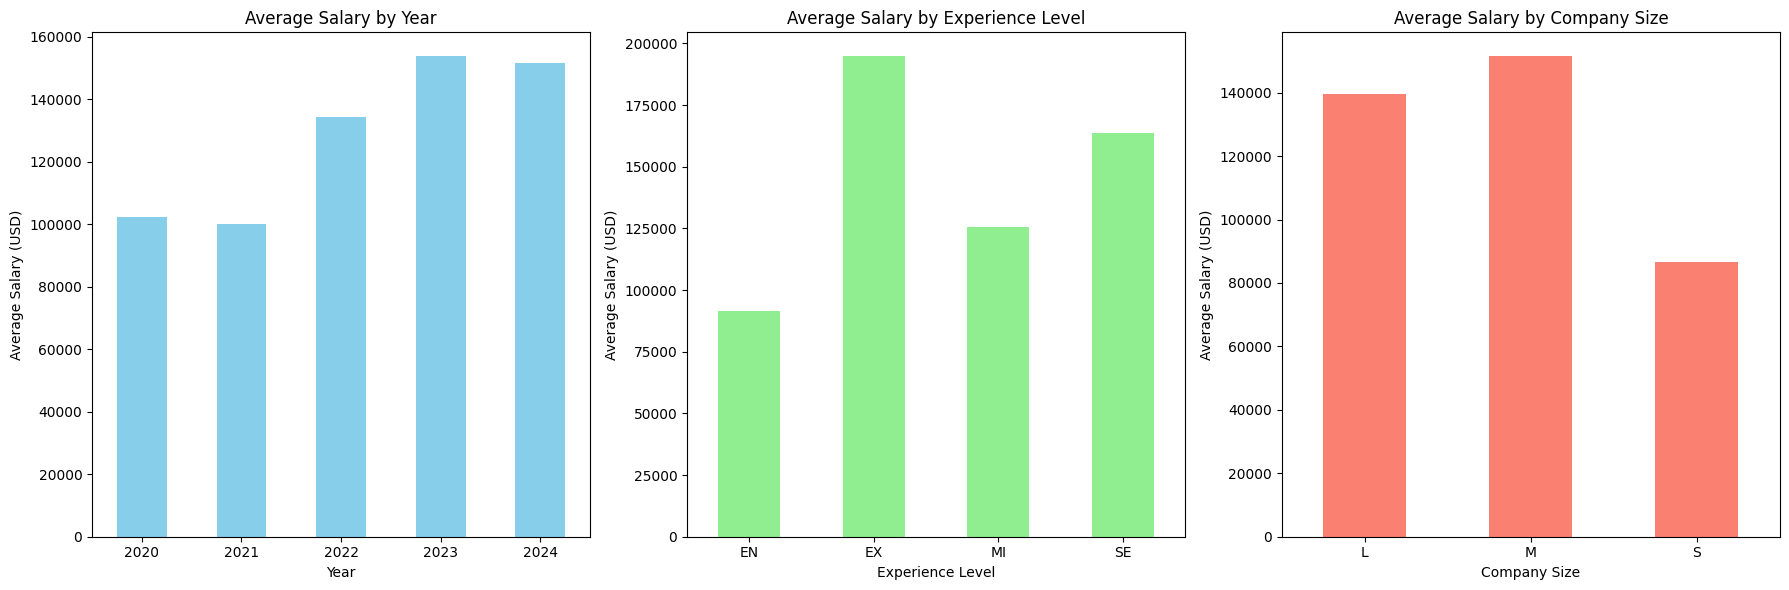

In [33]:

# there was an incostistency with Medium companies where it gave 2 different values so I had to clean and rerun it
df['company_size'] = df['company_size'].str.strip().str.upper()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

avg_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()
avg_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean()
avg_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean()

job_listings_per_company_size = df['company_size'].value_counts()
print("Number of job listings per company size:")
print(job_listings_per_company_size)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
avg_salary_by_year.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Year')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
avg_salary_by_experience.plot(kind='bar', color='lightgreen')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
avg_salary_by_company_size.plot(kind='bar', color='salmon')
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

1. We can see that there is an upward trend in salary year on year

2. As expected, Executive position tops the salary while entry level is below 100K

3. It seems medium size company pays the highest amount while small sized pay the lowest but it is important to highlight that while there is a big gap of listings
L - 983
M - 13674
S - 181

